In [1]:
library(readr)

In [2]:
hd_data <- read_csv("heart_desease.csv")
head(hd_data)
nrow(hd_data)


── Column specification ────────────────────────────────────────────────────────
cols(
  male = col_double(),
  age = col_double(),
  education = col_double(),
  currentSmoker = col_double(),
  cigsPerDay = col_double(),
  BPMeds = col_double(),
  prevalentStroke = col_double(),
  prevalentHyp = col_double(),
  diabetes = col_double(),
  totChol = col_double(),
  sysBP = col_double(),
  diaBP = col_double(),
  BMI = col_double(),
  heartRate = col_double(),
  glucose = col_double(),
  TenYearCHD = col_double()
)




male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


[1] 4238

[1] 4129

[1] 109

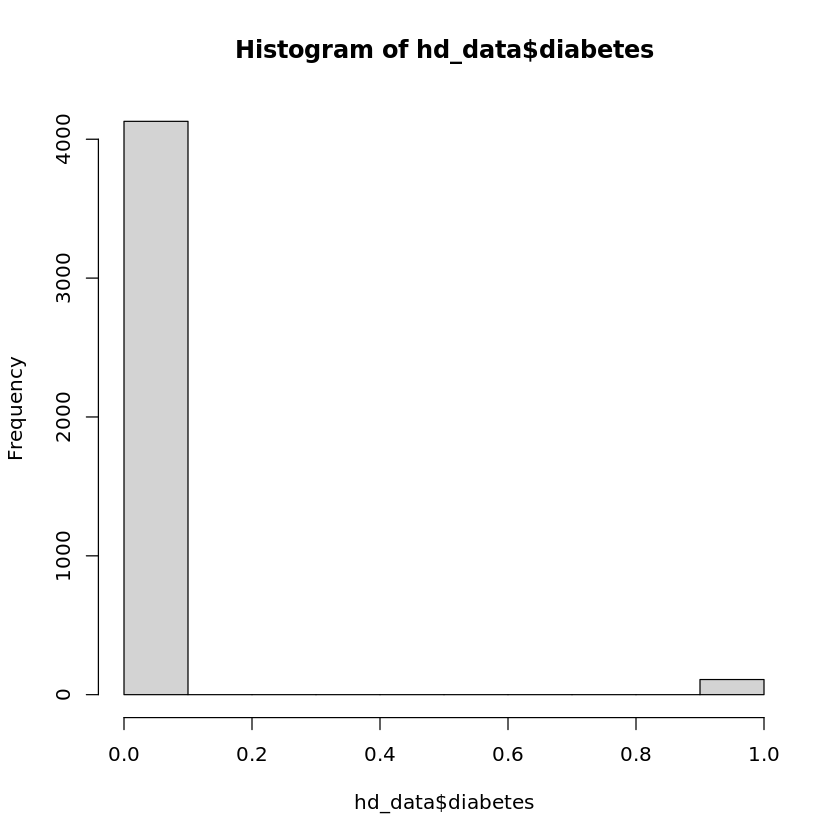

In [3]:
hist(hd_data$diabetes)
length(hd_data$diabetes[hd_data$diabetes == 0])
length(hd_data$diabetes[hd_data$diabetes == 1])

# Risk factors:
#### You are more likely to develop type 2 diabetes if you :

are overweight or obese

are age 45 or older

have a family history of diabetes

are African American, Alaska Native, American Indian, Asian American, Hispanic/Latino, Native Hawaiian, or Pacific Islander

have high blood pressure

have a low level of hDL (“good”) cholesterol

have a high level of LDL (“bad”) cholesterol, or a high level of triglycerides

have a history of gestational diabetes or gave birth to a baby weighing 9 pounds or more

are not physically active

have a history of heart disease or stroke

have depression NIH external link

have polycystic ovary syndrome NIH external link, also called PCOS

have acanthosis nigricans—dark, thick, and velvety skin around your neck or armpits

#### source: National Institute of Diabetes and Digestive kidney desease
https://www.niddk.nih.gov/health-information/diabetes/overview/risk-factors-type-2-diabetes

# The effects of smoking

In [4]:
aggregate(cigsPerDay~diabetes, data=hd_data, mean)

diabetes,cigsPerDay
<dbl>,<dbl>
0,9.075122
1,6.293578





### current smokers VS non-smokers




In [5]:
hd_sm <- hd_data[hd_data$currentSmoker==1, ]
hd_nonsm <- hd_data[hd_data$currentSmoker==0, ]
nrow(hd_sm)
nrow(hd_nonsm)

[1] 2094

[1] 2144

In [6]:
hd_data1 <- hd_data[,]
hd_data1$currentSmoker[hd_data1$currentSmoker==0] <- 'Non-smoker'
hd_data1$currentSmoker[hd_data1$currentSmoker==1] <- 'Smoker'
prop.table(table(hd_data1$currentSmoker,hd_data1$diabetes))

            
                       0           1
  Non-smoker 0.489381784 0.016517225
  Smoker     0.484898537 0.009202454

In [7]:
aggregate(cigsPerDay~diabetes, data=hd_sm, mean)

diabetes,cigsPerDay
<dbl>,<dbl>
0,18.36525
1,17.58974


In [8]:
t.test(cigsPerDay ~ diabetes, data=hd_sm, conf.level=0.9)


	Welch Two Sample t-test

data:  cigsPerDay by diabetes
t = 0.56905, df = 40.522, p-value = 0.5725
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -1.518580  3.069597
sample estimates:
mean in group 0 mean in group 1 
       18.36525        17.58974 


## The effect of age
### People older than 45 y.o. are considered to be in the risk category

In [9]:
# hd_older <- hd_data[hd_data$age>=45, ]
# hd_younger <- hd_data[hd_data$age<45, ]
# prop.table(table(hd_data1$currentSmoker,hd_data1$diabetes))

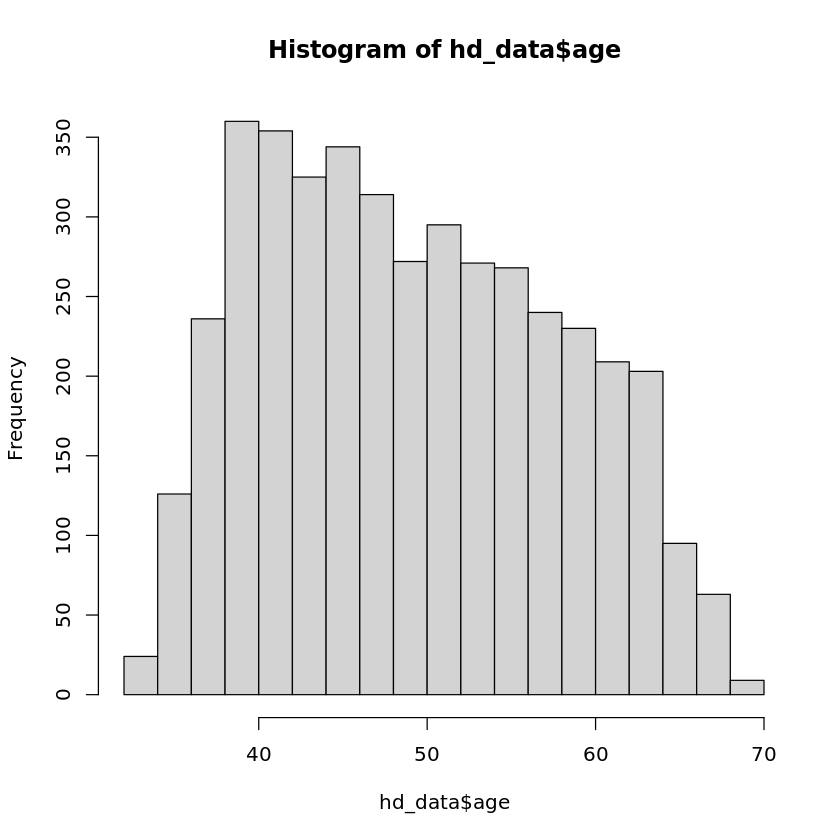

In [10]:
hist(hd_data$age)
# table(hd_data$age)

### mean test (testing if mean age of people who has diabetes is bigger)

In [11]:
aggregate(age~diabetes, data=hd_data, mean)

diabetes,age
<dbl>,<dbl>
0,49.44393
1,54.92661


In [12]:
# aggregate(age~diabetes, data=hd_data, sd)

In [13]:
hd_data1$diabetes[hd_data1$diabetes==0] <- 'Does not have diabetes'
hd_data1$diabetes[hd_data1$diabetes==1] <- 'Has diabetes'
hd_data1 <- hd_data1[complete.cases(hd_data1), ]
nrow(hd_data1)

[1] 3656

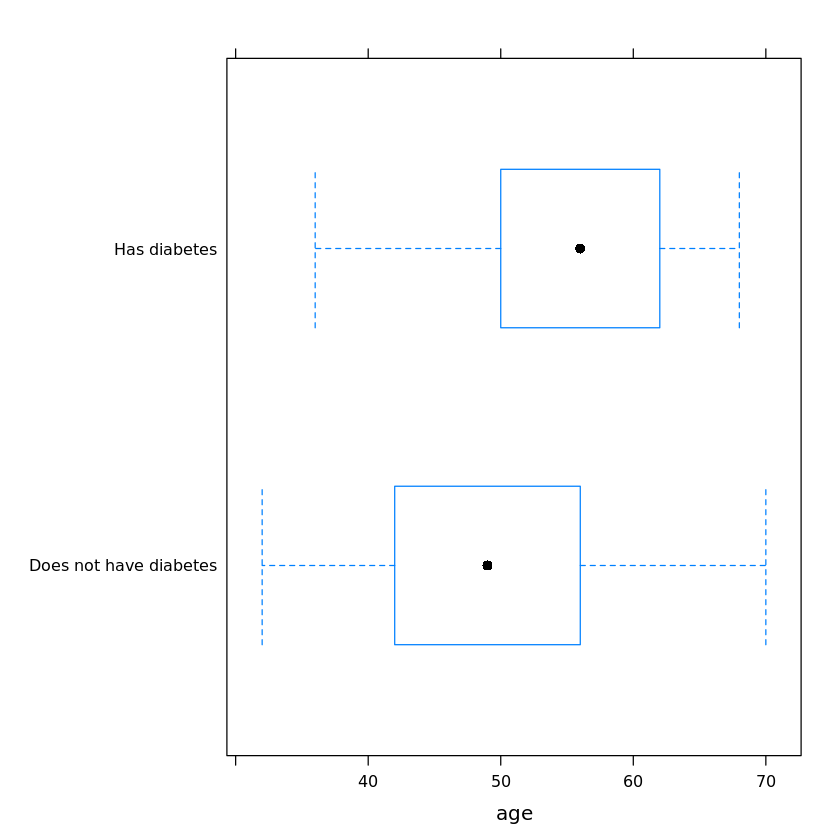

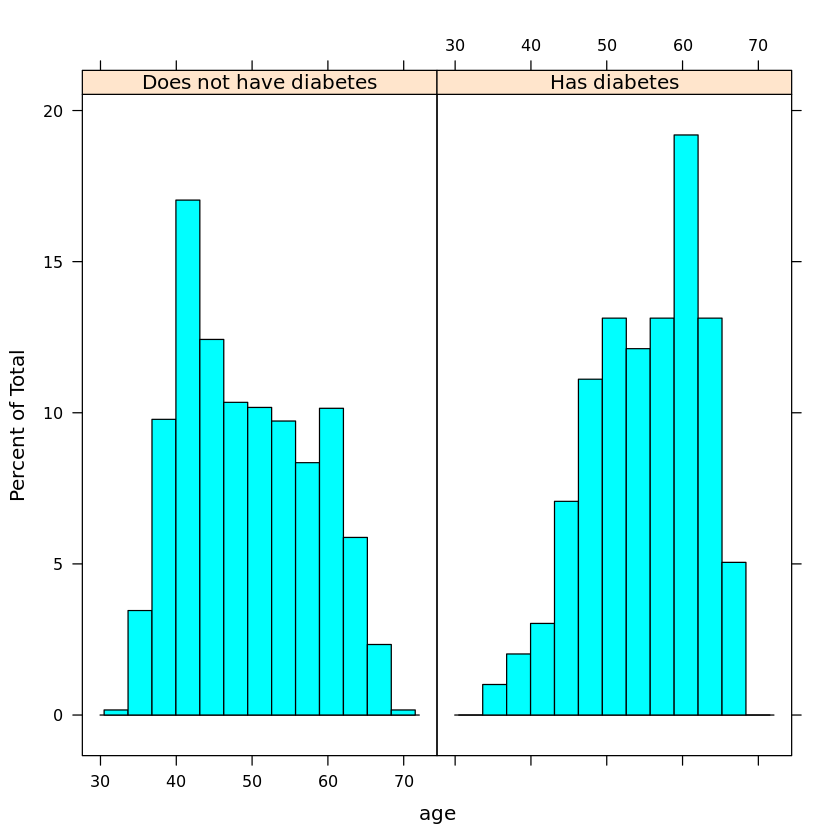

In [14]:
library(lattice)
# qqmath(~ age | diabetes, data = hd_data1)
bwplot(diabetes ~ age, data = hd_data1)
histogram(~ age|diabetes, data = hd_data1)

In [15]:
t.test(age ~ diabetes, data=hd_data1, alternative="less", conf.level=0.9)


	Welch Two Sample t-test

data:  age by diabetes
t = -7.5468, df = 105.3, p-value = 8.37e-12
alternative hypothesis: true difference in means is less than 0
90 percent confidence interval:
      -Inf -4.767222
sample estimates:
mean in group Does not have diabetes           mean in group Has diabetes 
                            49.40174                             55.15152 


### proportion test (testing if people older than 45 y.o. are more likely to have diabetes)

In [16]:
# hd_older <- hd_data[hd_data$age>=45, ]
# hd_younger <- hd_data[hd_data$age<45, ]
hd_data2 <- hd_data[complete.cases(hd_data), ]
hd_data2$age[hd_data2$age>=45] <- 'Older'
hd_data2$age[hd_data2$age<45] <- 'Younger'

In [17]:
table(hd_data2$age, hd_data2$diabetes)

         
             0    1
  Older   2334   90
  Younger 1223    9

In [18]:
prop.test(x=c(90,9), n=c(2424,1232), correct=FALSE, conf.level = 0.9, alternative = 'greater')


	2-sample test for equality of proportions without continuity
	correction

data:  c(90, 9) out of c(2424, 1232)
X-squared = 27.577, df = 1, p-value = 7.548e-08
alternative hypothesis: greater
90 percent confidence interval:
 0.02400202 1.00000000
sample estimates:
     prop 1      prop 2 
0.037128713 0.007305195 


# The effect of high blood pressure 
### (let's assume those who take BP medicaments have high BP)

In [19]:
hd_data3 <- hd_data[complete.cases(hd_data), ]
hd_data3$BPMeds[hd_data2$BPMeds==0] <- 'Normal BP'
hd_data3$BPMeds[hd_data2$BPMeds==1] <- 'High BP'

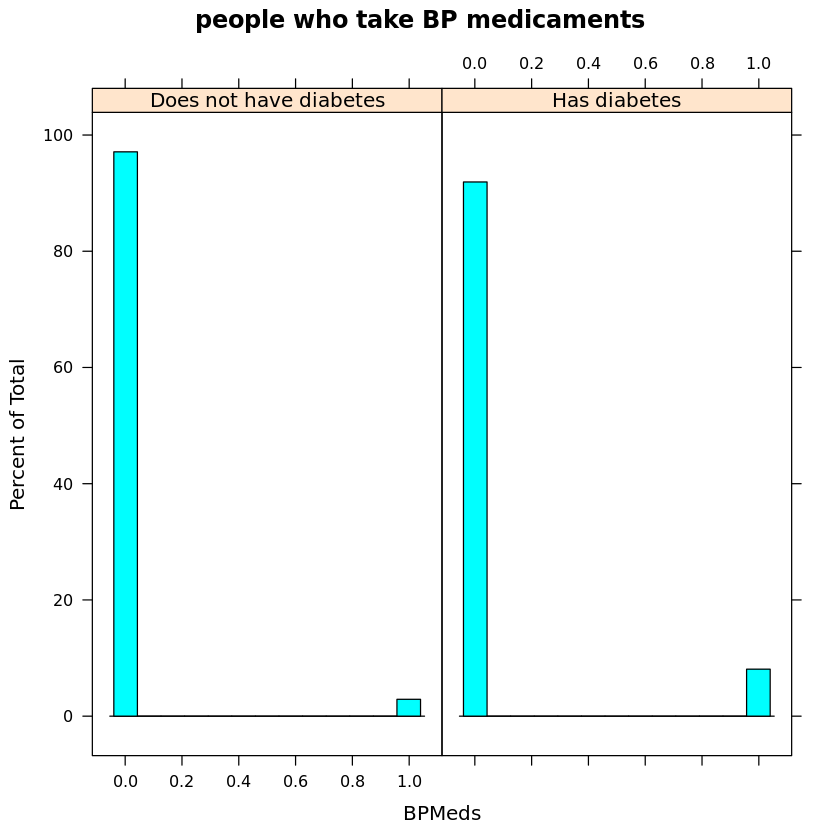

In [20]:
histogram(~ BPMeds|diabetes, data = hd_data1, main = "people who take BP medicaments")

In [21]:
table(hd_data3$BPMeds, hd_data3$diabetes)

           
               0    1
  High BP    103    8
  Normal BP 3454   91

In [22]:
prop.test(x=c(8,91), n=c(111,3545), correct=FALSE, conf.level = 0.9, alternative = 'greater')

Warning message in prop.test(x = c(8, 91), n = c(111, 3545), correct = FALSE, conf.level = 0.9, :
“Chi-squared approximation may be incorrect”



	2-sample test for equality of proportions without continuity
	correction

data:  c(8, 91) out of c(111, 3545)
X-squared = 8.7963, df = 1, p-value = 0.001509
alternative hypothesis: greater
90 percent confidence interval:
 0.01476162 1.00000000
sample estimates:
    prop 1     prop 2 
0.07207207 0.02566996 


### systolic blood pressure

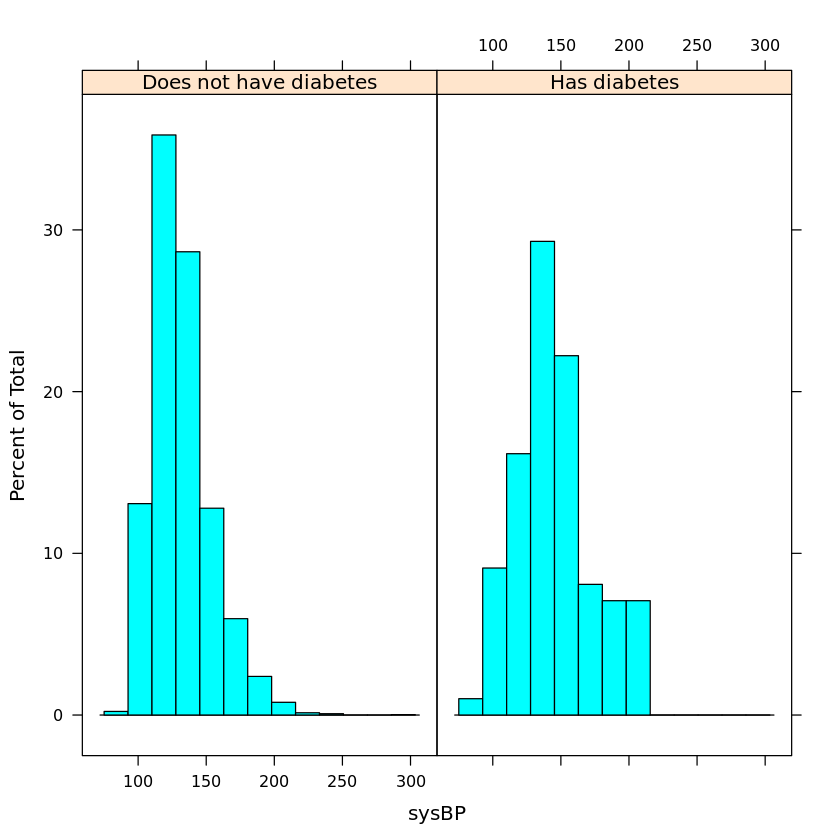

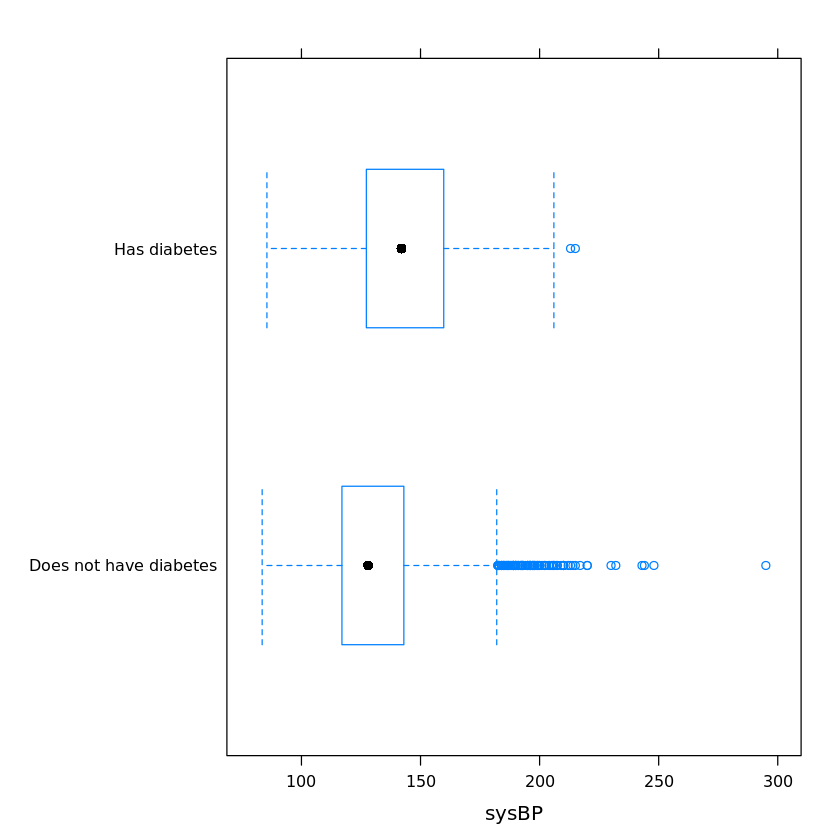

In [23]:
histogram(~ sysBP|diabetes, data = hd_data1)
bwplot(diabetes ~ sysBP, data = hd_data1)

In [29]:
t.test(sysBP ~ diabetes, data=hd_data1, alternative="less", conf.level=0.9).p-value


	Welch Two Sample t-test

data:  sysBP by diabetes
t = -4.8357, df = 101.21, p-value = 2.374e-06
alternative hypothesis: true difference in means is less than 0
90 percent confidence interval:
      -Inf -10.23567
sample estimates:
mean in group Does not have diabetes           mean in group Has diabetes 
                            131.9900                             145.9495 


# The effect of cholesterol

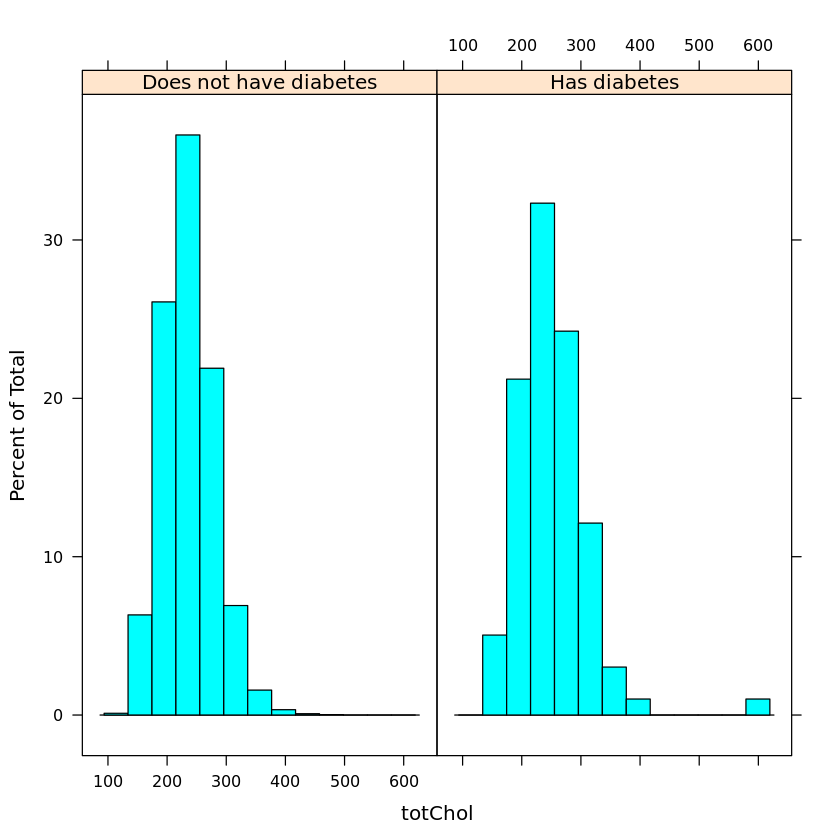

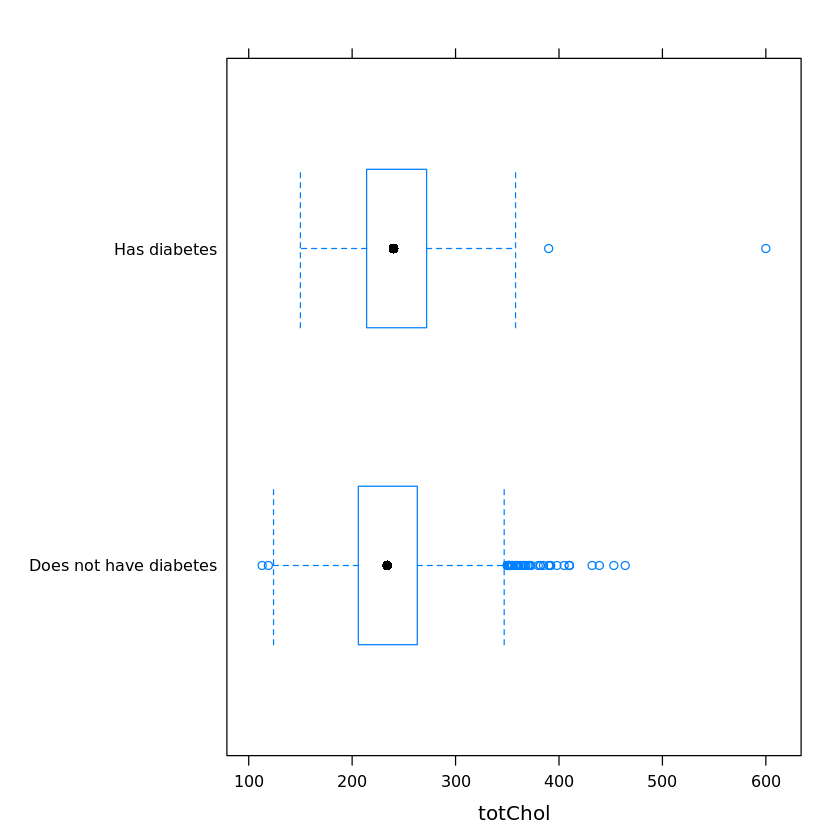

In [24]:
histogram(~ totChol|diabetes, data = hd_data1)
bwplot(diabetes ~ totChol, data = hd_data1)

In [25]:
t.test(totChol ~ diabetes, data=hd_data1, alternative="less", conf.level=0.9)


	Welch Two Sample t-test

data:  totChol by diabetes
t = -2.2018, df = 101, p-value = 0.01498
alternative hypothesis: true difference in means is less than 0
90 percent confidence interval:
     -Inf -5.44127
sample estimates:
mean in group Does not have diabetes           mean in group Has diabetes 
                            236.5173                             249.6566 


# The effect of Stroke

In [26]:
hd_data4 <- hd_data[complete.cases(hd_data), ]
hd_data4$prevalentStroke[hd_data2$prevalentStroke==1] <- 'Had Stroke'
hd_data4$prevalentStroke[hd_data2$prevalentStroke==0] <- 'Never had Stroke'

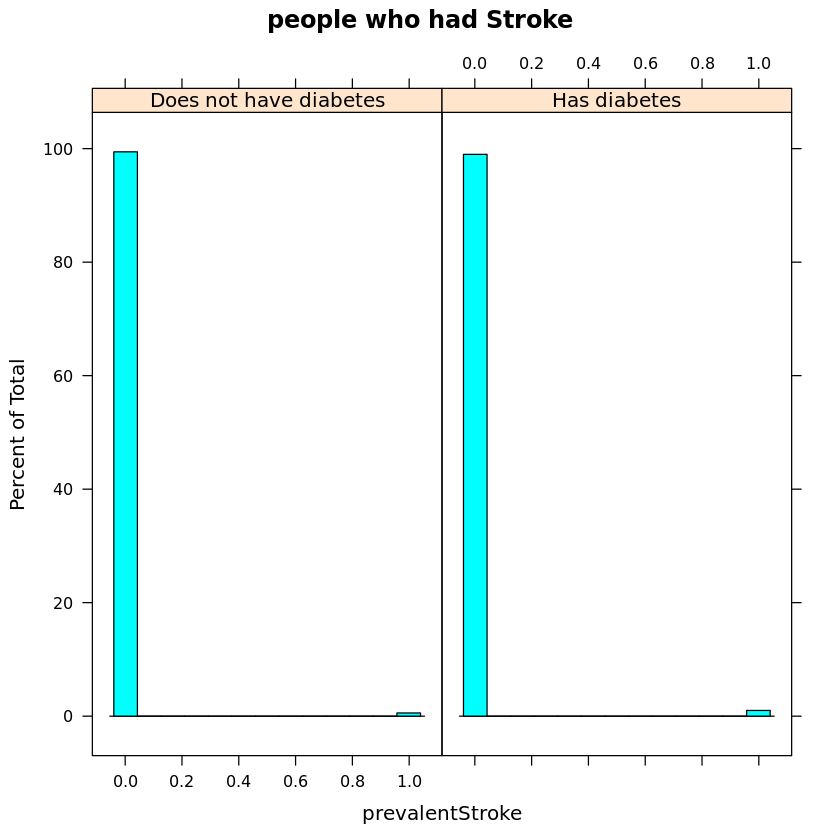

In [27]:
histogram(~ prevalentStroke|diabetes, data = hd_data1, main = "people who had Stroke")

In [28]:
table(hd_data4$prevalentStroke, hd_data4$diabetes)

                  
                      0    1
  Had Stroke         20    1
  Never had Stroke 3537   98